# Clustering Using K Means

Import the Lib

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [4]:
df_target=pd.read_csv('Data_1.csv')
df_target.drop(df_target.columns[0], axis=1)

,id,lat,lon,tags,type
0,148680663,47.555612,9.688680,marketplace,node
1,240937972,50.965599,7.182943,marketplace,node
2,255897613,49.880786,8.660928,marketplace,node
3,276043329,53.327598,9.878438,marketplace,node
4,293994974,53.093369,8.810666,marketplace,node
5,310254200,53.434488,8.821352,marketplace,node
6,359885958,50.391747,8.192193,marketplace,node
7,375779845,50.931824,7.025336,marketplace,node
8,392491700,53.586377,10.045311,marketplace,node
9,428178744,53.489726,10.181960,marketplace,node


In [5]:
# choose columns
df_target = df_target[['id', 'lat', 'lon','tags']]
df_target.head(10)

,id,lat,lon,tags
0,148680663,47.555612,9.688680,marketplace
1,240937972,50.965599,7.182943,marketplace
2,255897613,49.880786,8.660928,marketplace
3,276043329,53.327598,9.878438,marketplace
4,293994974,53.093369,8.810666,marketplace
5,310254200,53.434488,8.821352,marketplace
6,359885958,50.391747,8.192193,marketplace
7,375779845,50.931824,7.025336,marketplace
8,392491700,53.586377,10.045311,marketplace
9,428178744,53.489726,10.181960,marketplace


In [6]:
# Label Encoding the amenity types
labelencoder = LabelEncoder()
labelencoder.fit(df_target.iloc[:,3].values)
df_target.iloc[:,3]=labelencoder.transform(df_target.iloc[:,3])
df_target.head()

,id,lat,lon,tags
0,148680663,47.555612,9.688680,3
1,240937972,50.965599,7.182943,3
2,255897613,49.880786,8.660928,3
3,276043329,53.327598,9.878438,3
4,293994974,53.093369,8.810666,3


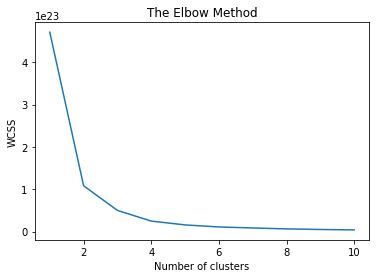

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=450,n_init=10,random_state=0)
    kmeans.fit(df_target)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [11]:
# Let n_cluster be 6 and 8
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
prediction_val = kmeans.fit_predict(df_target.values)
#dropping the predicted value into the column name cluster
data=prediction_val
cent = kmeans.cluster_centers_

In [12]:
#clust_labels = prediction_val
kmeans = pd.DataFrame(prediction_val)
df_target.insert((df_target.shape[1]),'kmeans',kmeans)

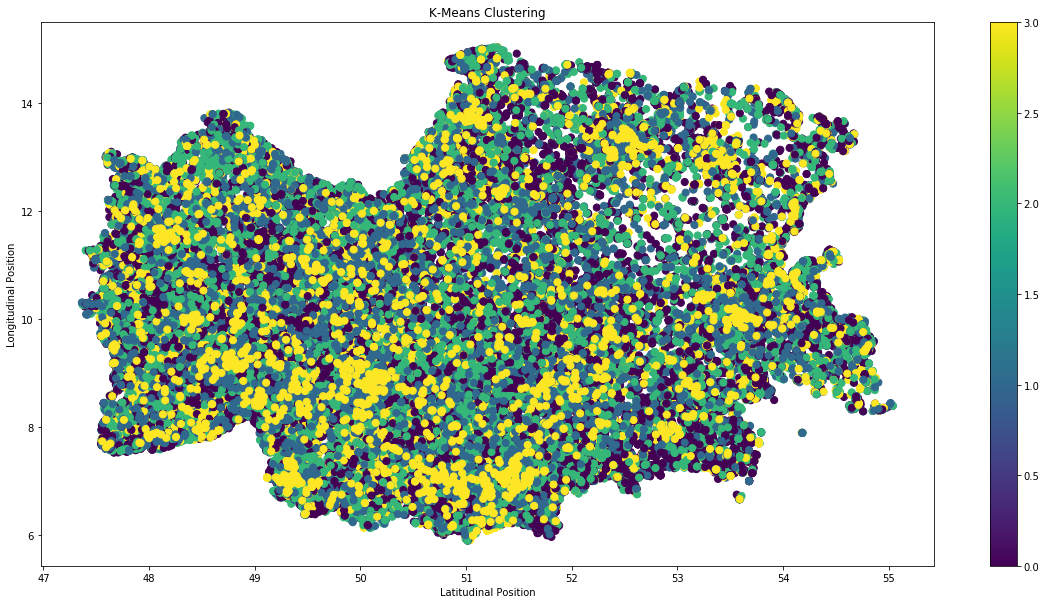

In [13]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_target['lat'],df_target['lon'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Latitudinal Position')
ax.set_ylabel('Longitudinal Position')
plt.colorbar(scatter)

In [14]:
ans = labelencoder.inverse_transform(prediction_val)
ans

array(['bank', 'bank', 'bank', ..., 'marketplace', 'marketplace',
       'marketplace'], dtype=object)

In [15]:
final_df=pd.DataFrame({'id':df_target['id'].values,'lat':df_target['lat'].values,'lon':df_target['lon'].values,'tags':df_target['tags'].values,'cluster':ans})

In [16]:
final_df.to_csv('knn_Geo.csv',index=False)
final_df.head()

,id,lat,lon,tags,cluster
0,148680663,47.555612,9.688680,3,bank
1,240937972,50.965599,7.182943,3,bank
2,255897613,49.880786,8.660928,3,bank
3,276043329,53.327598,9.878438,3,bank
4,293994974,53.093369,8.810666,3,bank
